# Twitter Sentiment Analysis
Analyze and visualize sentiment patterns in tweets to understand public opinion on entities.

In [6]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Load data
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']
df = df.dropna(subset=['Tweet'])
df = df.drop_duplicates(subset='Tweet').reset_index(drop=True)

In [8]:
# Clean tweets
def clean_tweet(text):
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)
    text = re.sub(r'@\\w+|#', '', text)
    text = re.sub(r'[^\\w\\s]', '', text)
    text = text.lower()
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)

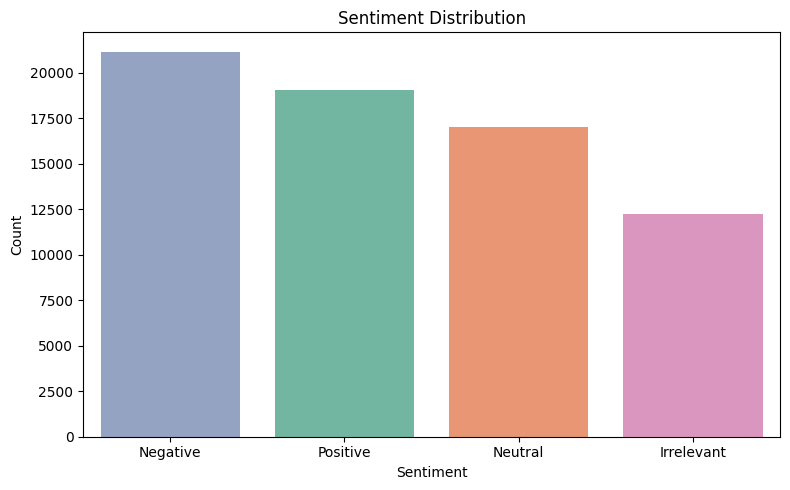

In [9]:
# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

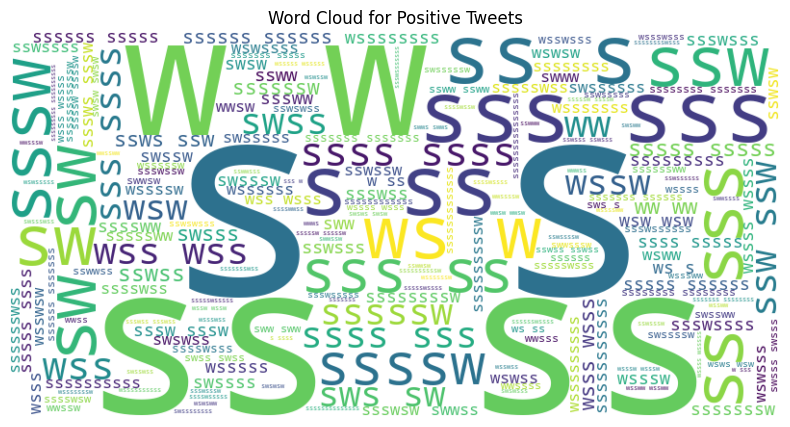

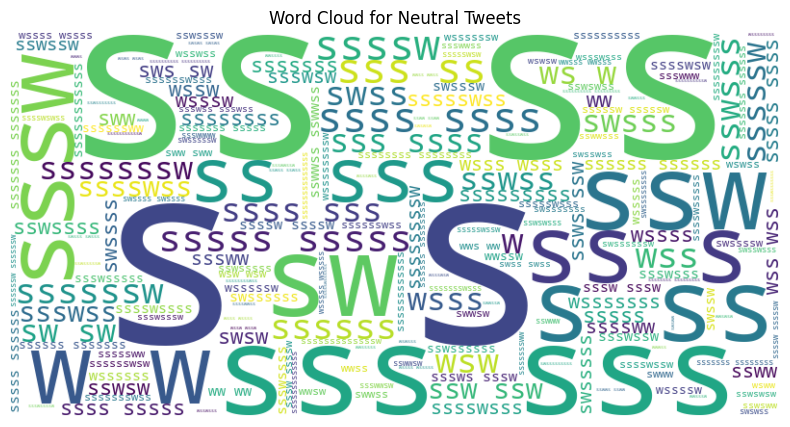

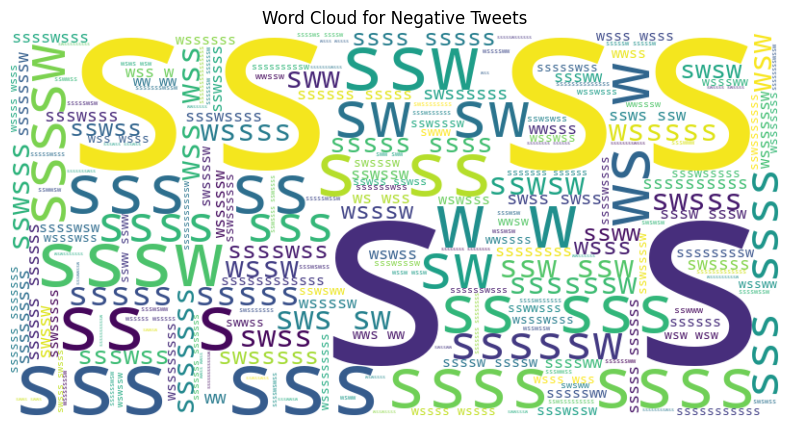

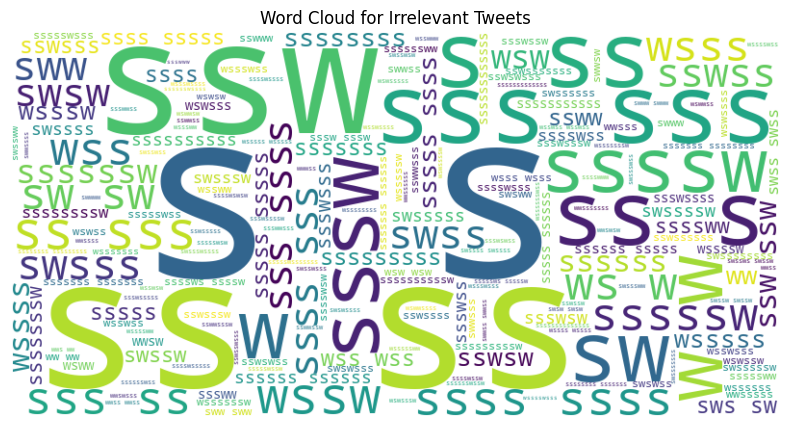

In [10]:
# Generate word clouds per sentiment
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()